In [3]:
#Random Forest Model
import pandas as pd
train = pd.read_csv("dptrain.csv")
test=pd.read_csv("dptest.csv")
X_train = train.drop("Loan_Status",axis=1)
y_train= train["Loan_Status"]
X_test = test.drop("Loan_Status",axis=1)
y_test=test["Loan_Status"]

In [ ]:
##Random Forest Setup**
- Train: X rows
- Test: Y rows
- Target: Loan_Status


In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,     
    max_depth=None,       
    random_state=42,
    class_weight='balanced'  
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
##Model
- Random Forest Classifier
- Trees = 100
- Balanced weights for fair approval/rejection prediction


In [5]:
y_pred_rf = rf.predict(X_test)


In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.8373983739837398
Confusion Matrix:
 [[21 17]
 [ 3 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.55      0.68        38
           1       0.83      0.96      0.89        85

    accuracy                           0.84       123
   macro avg       0.85      0.76      0.78       123
weighted avg       0.84      0.84      0.83       123



                     Feature  Importance
4             Credit_History    0.128161
628                      DTI    0.085232
0            ApplicantIncome    0.083032
627              TotalIncome    0.082138
2                 LoanAmount    0.075114
1          CoapplicantIncome    0.052964
3           Loan_Amount_Term    0.024253
625  Property_Area_Semiurban    0.023532
619              Married_Yes    0.016746
623   Education_Not Graduate    0.014442


<Figure size 600x400 with 0 Axes>

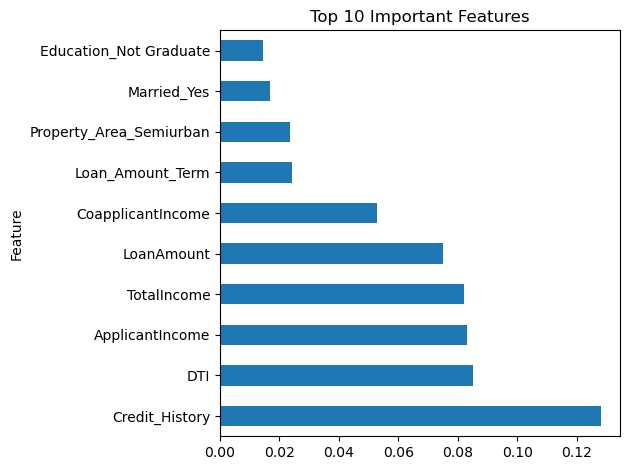

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))
plt.figure(figsize=(6,4))
feature_importance.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.savefig("randomforest.png", bbox_inches="tight")
plt.show()


In [ ]:
##Feature Importance
- Shows which factors most affect loan approval
- Example: Credit_History, DTI, TotalIncome are top predictors


In [11]:
import joblib
joblib.dump(rf,"random_forest.pk1")

['random_forest.pk1']

In [ ]:
##Saved Model
- Random Forest saved as random_forest.pkl


In [ ]:
##Deliverables for Step 7
-Notebook: 06-random-forest.ipynb.
-Model file: random_forest.pkl.
